# Pharmaceutical Companies Racing for Vaccine Portfolio Risk and Returns (Coronavirus)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Pharmaceutical Companie Vanccine 
symbols = ['MRNA','INO','NVAX','GILD','JNJ','PFE','SNY','GSK']
start = '2019-12-01'
end = '2020-04-20'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

137

In [7]:
df.head()

,MRNA,INO,NVAX,GILD,JNJ,PFE,SNY,GSK
Date,,,,,,,,
2019-12-02,19.760000,2.51,5.22,64.901039,136.489655,37.902821,45.820000,44.344246
2019-12-03,21.280001,2.55,4.77,64.851959,136.290924,37.665249,45.549999,44.067894
2019-12-04,21.270000,2.47,4.88,65.519424,138.496857,37.754337,46.610001,44.482418
2019-12-05,20.639999,2.33,4.55,64.714546,138.675705,37.645451,46.080002,44.620594
2019-12-06,18.940001,2.38,4.35,65.843346,139.490524,37.902821,46.029999,44.916679


In [8]:
df.tail()

,MRNA,INO,NVAX,GILD,JNJ,PFE,SNY,GSK
Date,,,,,,,,
2020-04-13,32.900002,7.76,17.639999,75.279999,139.770004,35.139999,44.380001,38.939999
2020-04-14,34.660000,7.44,18.000000,77.750000,146.029999,36.439999,45.970001,40.380001
2020-04-15,37.250000,7.14,17.530001,74.629997,147.660004,35.970001,45.150002,39.820000
2020-04-16,40.599998,7.89,18.100000,76.540001,149.669998,35.880001,46.130001,41.799999
2020-04-17,46.849998,8.26,19.080000,83.989998,152.020004,36.910000,47.750000,42.070000


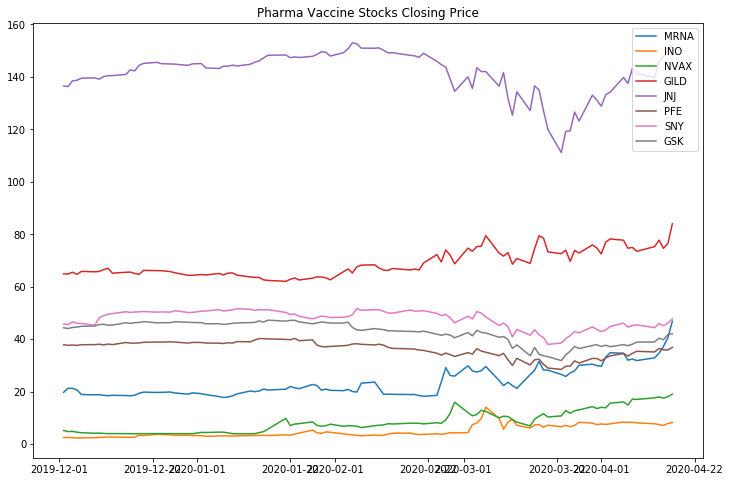

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Pharma Vaccine Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

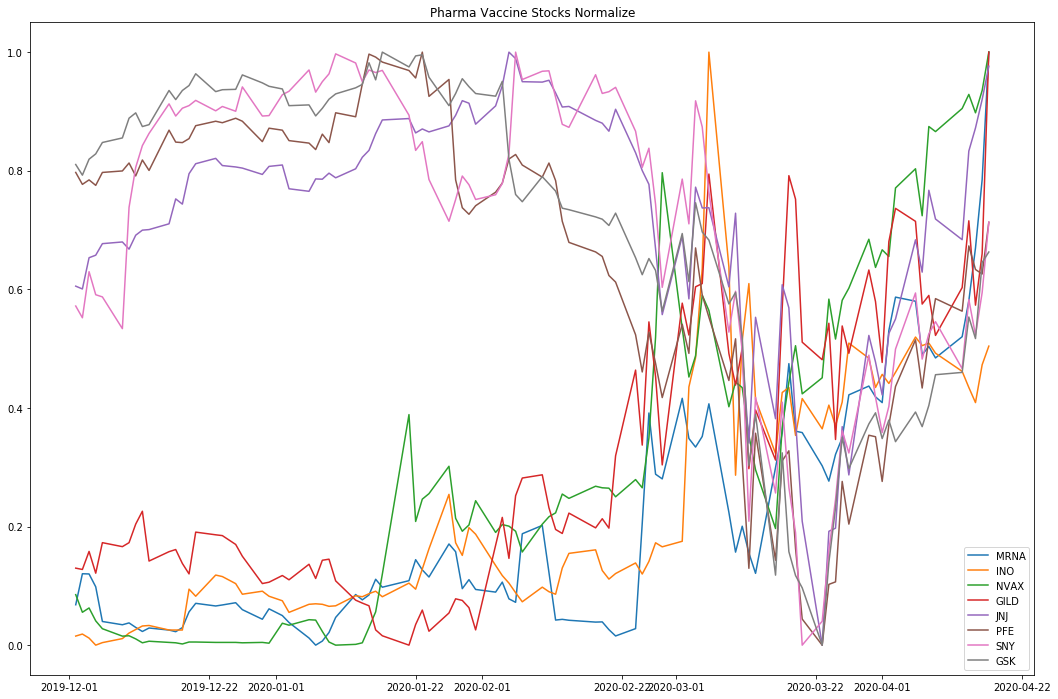

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Pharma Vaccine Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

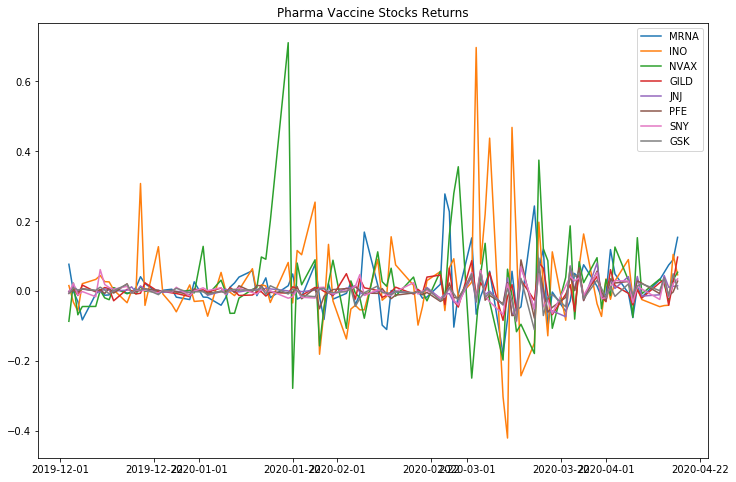

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Pharma Vaccine Stocks Returns')
plt.legend(labels=stock_rets.columns)

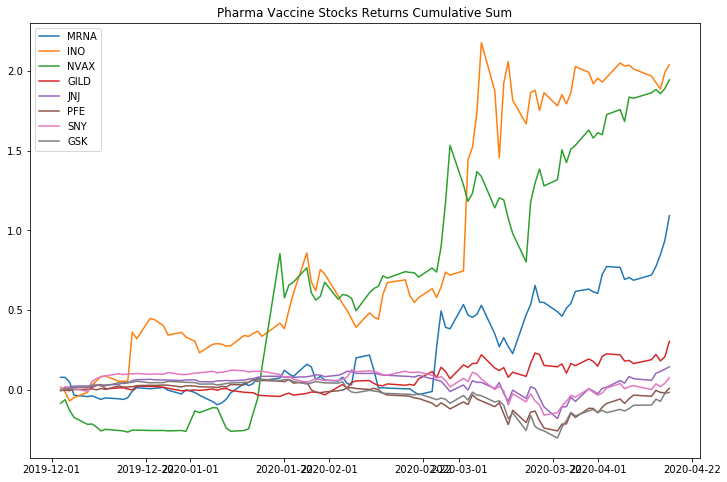

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Pharma Vaccine Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

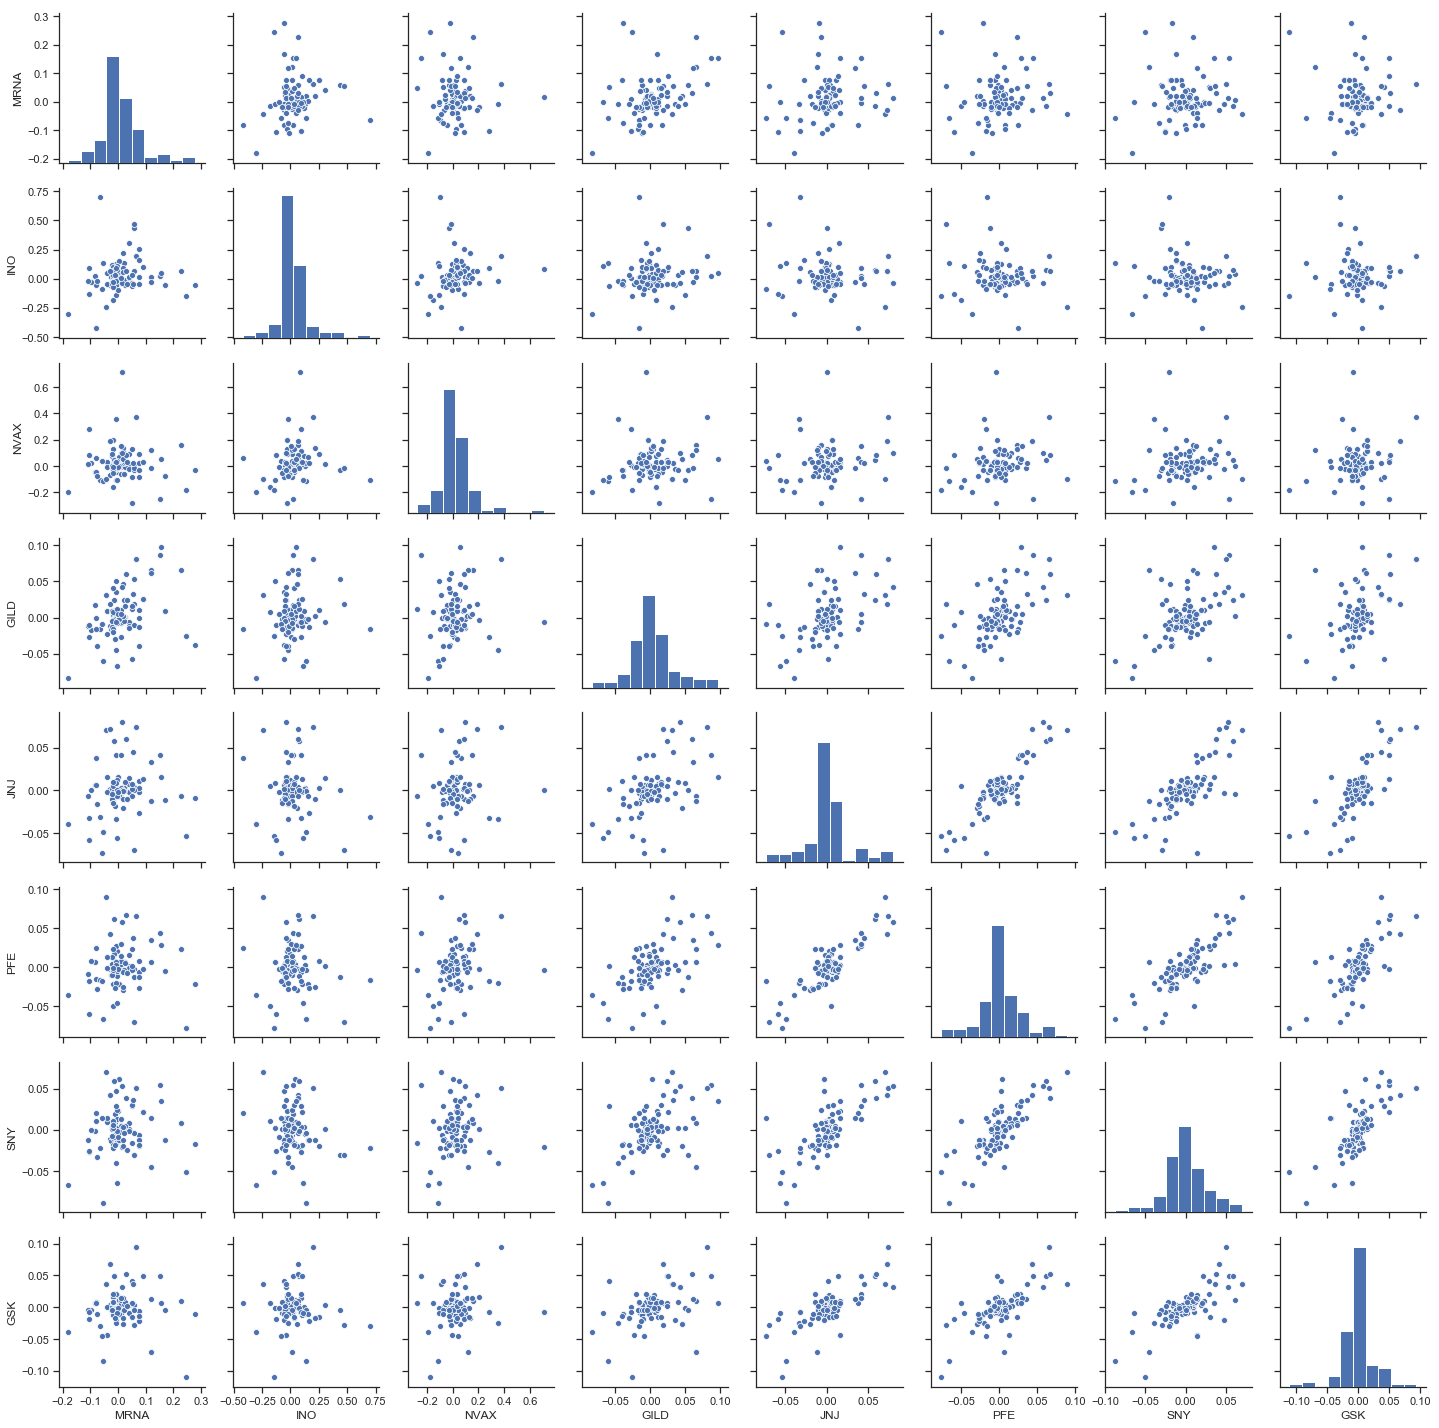

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

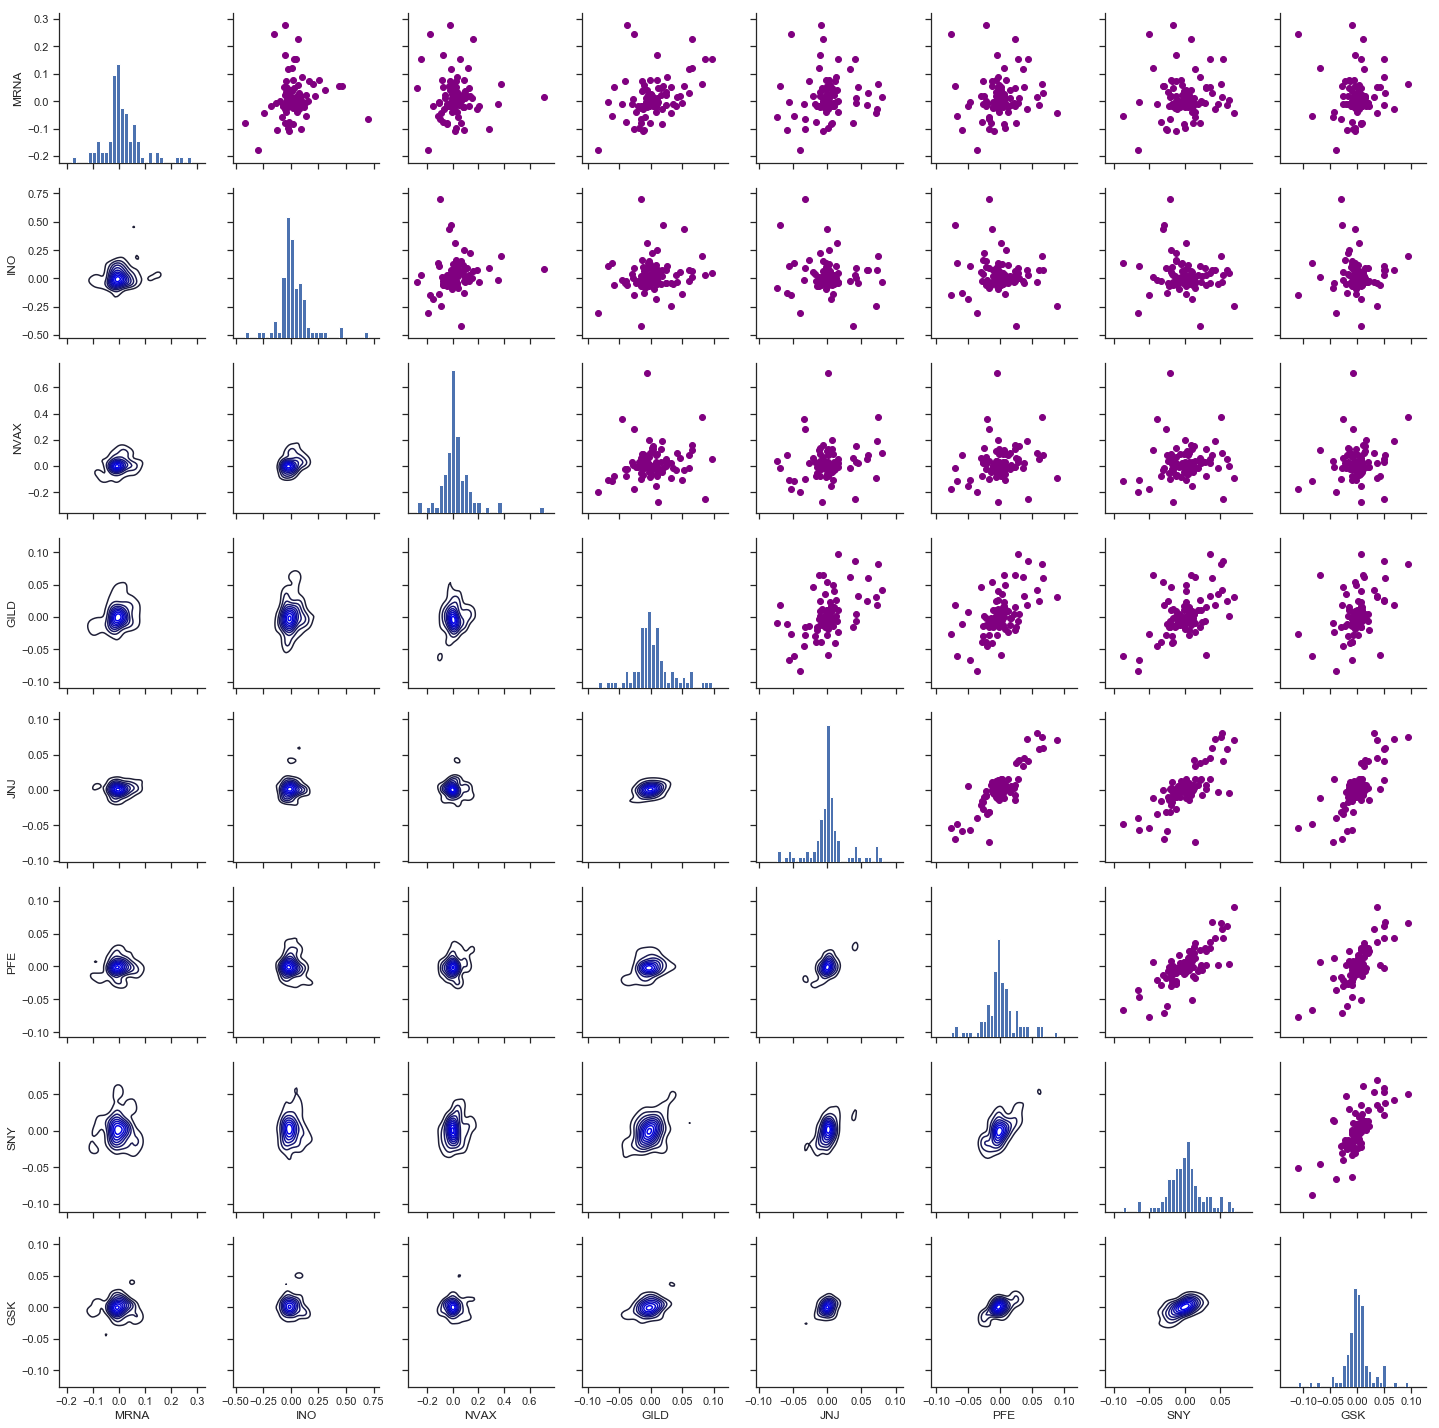

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

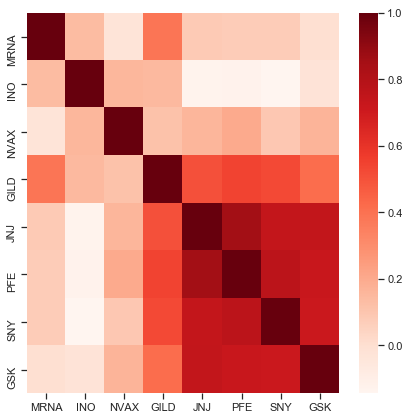

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

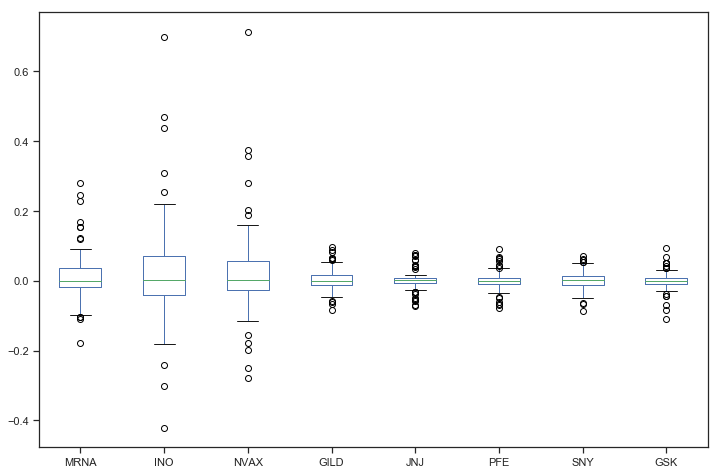

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

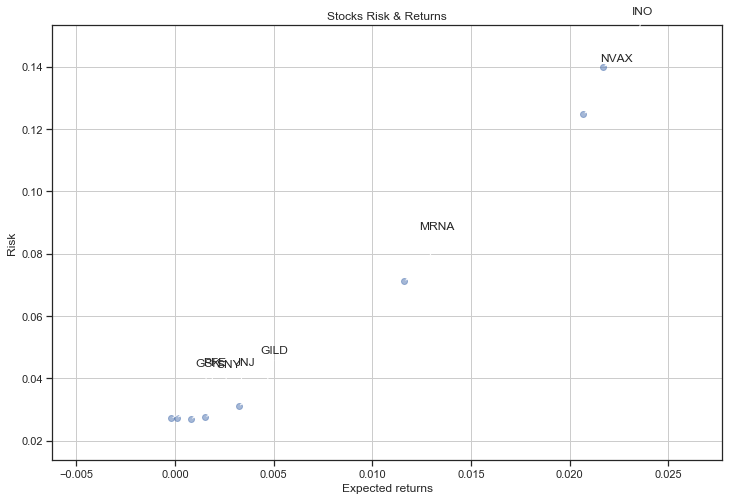

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

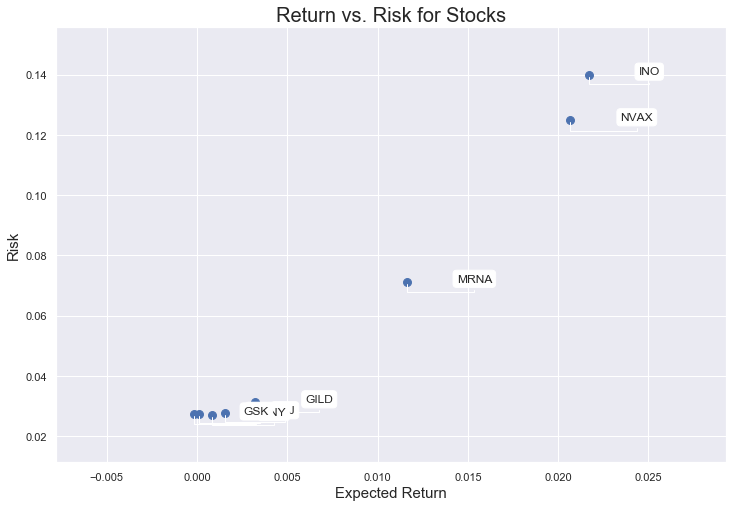

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

GSK   GSK     1.000000
SNY   SNY     1.000000
INO   INO     1.000000
NVAX  NVAX    1.000000
GILD  GILD    1.000000
JNJ   JNJ     1.000000
PFE   PFE     1.000000
MRNA  MRNA    1.000000
PFE   JNJ     0.861104
JNJ   PFE     0.861104
PFE   SNY     0.773973
SNY   PFE     0.773973
GSK   JNJ     0.748842
JNJ   GSK     0.748842
      SNY     0.741214
SNY   JNJ     0.741214
PFE   GSK     0.724004
GSK   PFE     0.724004
      SNY     0.718149
SNY   GSK     0.718149
GILD  PFE     0.548195
PFE   GILD    0.548195
SNY   GILD    0.530566
GILD  SNY     0.530566
      JNJ     0.508266
JNJ   GILD    0.508266
GSK   GILD    0.415257
GILD  GSK     0.415257
MRNA  GILD    0.388209
GILD  MRNA    0.388209
                ...   
NVAX  JNJ     0.161689
JNJ   NVAX    0.161689
INO   NVAX    0.158875
NVAX  INO     0.158875
GILD  INO     0.148613
INO   GILD    0.148613
      SNY     0.143877
SNY   INO     0.143877
MRNA  INO     0.138433
INO   MRNA    0.138433
JNJ   INO     0.128131
INO   JNJ     0.128131
      PFE  

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,MRNA,INO,NVAX,GILD,JNJ,PFE,SNY,GSK
Date,,,,,,,,
2019-12-03,0.560520,0.390338,0.193969,0.457627,0.467620,0.425739,0.519081,0.508605
2019-12-04,0.391456,0.347992,0.304473,0.518717,0.582954,0.477449,0.704538,0.584934
2019-12-05,0.327780,0.325339,0.212763,0.393884,0.485582,0.446007,0.484243,0.554183
2019-12-06,0.212560,0.395282,0.236698,0.558254,0.515552,0.504231,0.549652,0.571410
2019-12-09,0.374029,0.406161,0.236979,0.449443,0.482727,0.467975,0.455701,0.551892


In [23]:
Normalized_Value.corr()

,MRNA,INO,NVAX,GILD,JNJ,PFE,SNY,GSK
MRNA,1.000000,0.138433,-0.025567,0.388209,0.084960,0.076733,0.075363,-0.000692
INO,0.138433,1.000000,0.158875,0.148613,-0.128131,-0.121590,-0.143877,-0.022506
NVAX,-0.025567,0.158875,1.000000,0.119585,0.161689,0.201658,0.095427,0.168451
GILD,0.388209,0.148613,0.119585,1.000000,0.508266,0.548195,0.530566,0.415257
JNJ,0.084960,-0.128131,0.161689,0.508266,1.000000,0.861104,0.741214,0.748842
PFE,0.076733,-0.121590,0.201658,0.548195,0.861104,1.000000,0.773973,0.724004
SNY,0.075363,-0.143877,0.095427,0.530566,0.741214,0.773973,1.000000,0.718149
GSK,-0.000692,-0.022506,0.168451,0.415257,0.748842,0.724004,0.718149,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

GSK   GSK     1.000000
SNY   SNY     1.000000
INO   INO     1.000000
NVAX  NVAX    1.000000
GILD  GILD    1.000000
JNJ   JNJ     1.000000
PFE   PFE     1.000000
MRNA  MRNA    1.000000
PFE   JNJ     0.861104
JNJ   PFE     0.861104
PFE   SNY     0.773973
SNY   PFE     0.773973
GSK   JNJ     0.748842
JNJ   GSK     0.748842
      SNY     0.741214
SNY   JNJ     0.741214
PFE   GSK     0.724004
GSK   PFE     0.724004
      SNY     0.718149
SNY   GSK     0.718149
GILD  PFE     0.548195
PFE   GILD    0.548195
SNY   GILD    0.530566
GILD  SNY     0.530566
      JNJ     0.508266
JNJ   GILD    0.508266
GSK   GILD    0.415257
GILD  GSK     0.415257
MRNA  GILD    0.388209
GILD  MRNA    0.388209
                ...   
NVAX  JNJ     0.161689
JNJ   NVAX    0.161689
INO   NVAX    0.158875
NVAX  INO     0.158875
GILD  INO     0.148613
INO   GILD    0.148613
      SNY     0.143877
SNY   INO     0.143877
MRNA  INO     0.138433
INO   MRNA    0.138433
JNJ   INO     0.128131
INO   JNJ     0.128131
      PFE  

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
MRNA    0.011607
INO     0.021686
NVAX    0.020682
GILD    0.003224
JNJ     0.001522
PFE     0.000088
SNY     0.000800
GSK    -0.000191
dtype: float64
--------------------------------------------------
Stock risks:
MRNA    0.071217
INO     0.139997
NVAX    0.124842
GILD    0.031218
JNJ     0.027595
PFE     0.027393
SNY     0.026974
GSK     0.027188
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
GSK,-0.000191,0.027188
PFE,0.000088,0.027393
SNY,0.000800,0.026974
JNJ,0.001522,0.027595
GILD,0.003224,0.031218
MRNA,0.011607,0.071217
NVAX,0.020682,0.124842
INO,0.021686,0.139997


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
SNY,0.000800,0.026974
GSK,-0.000191,0.027188
PFE,0.000088,0.027393
JNJ,0.001522,0.027595
GILD,0.003224,0.031218
MRNA,0.011607,0.071217
NVAX,0.020682,0.124842
INO,0.021686,0.139997


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
MRNA,0.011607,0.071217,0.022566
INO,0.021686,0.139997,0.083475
NVAX,0.020682,0.124842,0.085561
GILD,0.003224,0.031218,-0.217069
JNJ,0.001522,0.027595,-0.307241
PFE,0.000088,0.027393,-0.361833
SNY,0.000800,0.026974,-0.341075
GSK,-0.000191,0.027188,-0.374827


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
MRNA,0.011607,0.071217,0.022566,0.278107,-0.179669,-0.001416,15.394089
INO,0.021686,0.139997,0.083475,0.697039,-0.420142,0.003205,4.689485
NVAX,0.020682,0.124842,0.085561,0.710801,-0.278004,0.001202,5.414362
GILD,0.003224,0.031218,-0.217069,0.097335,-0.083520,-0.000844,9.733469
JNJ,0.001522,0.027595,-0.307241,0.079977,-0.072984,0.000477,1.570125
PFE,0.000088,0.027393,-0.361833,0.089607,-0.077346,-0.001499,2.870677
SNY,0.000800,0.026974,-0.341075,0.069733,-0.087520,0.001084,3.511812
GSK,-0.000191,0.027188,-0.374827,0.094446,-0.110436,0.000322,0.645934


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
MRNA,0.011607,0.071217,0.022566,0.278107,-0.179669,-0.001416,15.394089,0.001046
INO,0.021686,0.139997,0.083475,0.697039,-0.420142,0.003205,4.689485,0.000335
NVAX,0.020682,0.124842,0.085561,0.710801,-0.278004,0.001202,5.414362,0.000385
GILD,0.003224,0.031218,-0.217069,0.097335,-0.083520,-0.000844,9.733469,0.000678
JNJ,0.001522,0.027595,-0.307241,0.079977,-0.072984,0.000477,1.570125,0.000114
PFE,0.000088,0.027393,-0.361833,0.089607,-0.077346,-0.001499,2.870677,0.000207
SNY,0.000800,0.026974,-0.341075,0.069733,-0.087520,0.001084,3.511812,0.000252
GSK,-0.000191,0.027188,-0.374827,0.094446,-0.110436,0.000322,0.645934,0.000047


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
MRNA,0.011607,0.071217,0.022566,0.278107,-0.179669,-0.001416,15.394089,0.001046,3.893715
INO,0.021686,0.139997,0.083475,0.697039,-0.420142,0.003205,4.689485,0.000335,7.944202
NVAX,0.020682,0.124842,0.085561,0.710801,-0.278004,0.001202,5.414362,0.000385,9.849802
GILD,0.003224,0.031218,-0.217069,0.097335,-0.083520,-0.000844,9.733469,0.000678,0.606831
JNJ,0.001522,0.027595,-0.307241,0.079977,-0.072984,0.000477,1.570125,0.000114,0.219232
PFE,0.000088,0.027393,-0.361833,0.089607,-0.077346,-0.001499,2.870677,0.000207,-0.047651
SNY,0.000800,0.026974,-0.341075,0.069733,-0.087520,0.001084,3.511812,0.000252,0.078845
GSK,-0.000191,0.027188,-0.374827,0.094446,-0.110436,0.000322,0.645934,0.000047,-0.092300


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
GSK,-0.000191,0.027188,-0.374827,0.094446,-0.110436,0.000322,0.645934,0.000047,-0.092300
JNJ,0.001522,0.027595,-0.307241,0.079977,-0.072984,0.000477,1.570125,0.000114,0.219232
PFE,0.000088,0.027393,-0.361833,0.089607,-0.077346,-0.001499,2.870677,0.000207,-0.047651
SNY,0.000800,0.026974,-0.341075,0.069733,-0.087520,0.001084,3.511812,0.000252,0.078845
INO,0.021686,0.139997,0.083475,0.697039,-0.420142,0.003205,4.689485,0.000335,7.944202
NVAX,0.020682,0.124842,0.085561,0.710801,-0.278004,0.001202,5.414362,0.000385,9.849802
GILD,0.003224,0.031218,-0.217069,0.097335,-0.083520,-0.000844,9.733469,0.000678,0.606831
MRNA,0.011607,0.071217,0.022566,0.278107,-0.179669,-0.001416,15.394089,0.001046,3.893715
